In [1]:
import numpy as np
from scipy import integrate as integ
from turing_model import TuringModel as tm
from matplotlib import pyplot as plt

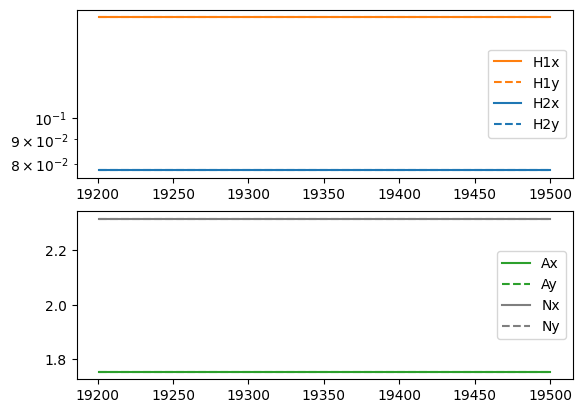

In [33]:
fig, (ax1,ax2)=plt.subplots(2)
t_end = 20000
number_steps = 20000
t = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]


start = 19200
end = 19500

var = []
k_1 = 0
k_2 = 0
d_Hmax1 = 10**-1
d_Hmax2 = 10**0
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

ax1.plot(t[start:end], var[start:end, 4], label="H1x",color="tab:orange")
ax1.plot(t[start:end], var[start:end, 5], label="H1y",color="tab:orange", linestyle="--")
ax1.plot(t[start:end], var[start:end, 6], label="H2x",color="tab:blue")
ax1.plot(t[start:end], var[start:end, 7], label="H2y",color="tab:blue", linestyle="--")
ax1.set_yscale("log")
ax1.legend()
ax2.plot(t[start:end], var[start:end:, 2], label="Ax",color="tab:green")
ax2.plot(t[start:end], var[start:end:, 3], label="Ay",color="tab:green", linestyle="--")
ax2.plot(t[start:end], var[start:end:, 0], label="Nx",color="tab:grey")
ax2.plot(t[start:end], var[start:end:, 1], label="Ny",color="tab:grey", linestyle="--")
ax2.legend()